In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, linregress
from scipy.integrate import trapz

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


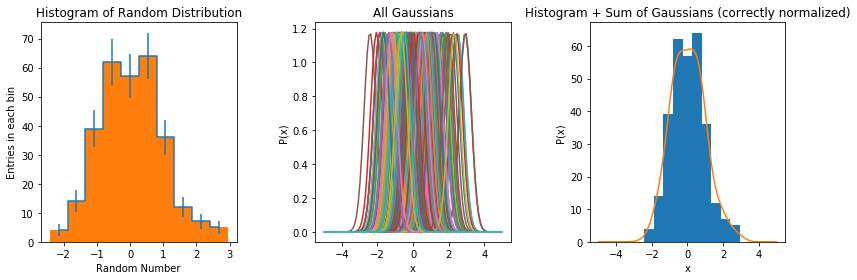

In [113]:
N = 300
Nbins = 10
mean = 0
std = 1
xmin, xmax = -5, 5
r = np.random.normal(mean, std, N)
x = np.linspace(xmin,xmax,100)
y, edges = np.histogram(r,bins=Nbins)
bin_centers = 0.5*(edges[1:] + edges[:-1])
binlength = edges[1] - edges[0]
errors = np.sqrt(y)
stds = np.ones(N) * 1.06 * r.size**(-1.0/5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax1.set_title("Histogram of Random Distribution")
ax1.set_xlabel("Random Number")
ax1.set_ylabel("Entries in each bin")
ax1.errorbar(bin_centers, y, errors, drawstyle = 'steps-mid')
ax1.hist(r, Nbins)


gaussians = [norm(loc=r[i],scale=stds[i]) for i in range(N)]

ax2.set_xlabel("x")
ax2.set_ylabel("P(x)")
ax2.set_title("All Gaussians")
for g in gaussians: ax2.plot(x,g.pdf(x))

ax3.set_title("Histogram + Sum of Gaussians (correctly normalized)")
ax3.set_xlabel("x")
ax3.set_ylabel("P(x)")
ax3.hist(r, Nbins)
def gsum(x):
    output=0
    for i in range(len(gaussians)):
        output+=gaussians[i].pdf(x)
    return output

dx = 1e-8
Norm = trapz(gsum(x),x,dx=dx)

ax3.plot(x,gsum(x)/Norm*N*binlength)
fig.tight_layout()

In [111]:
binlength

0.532906358838674

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2019-04-04 15:24:04--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... ^C


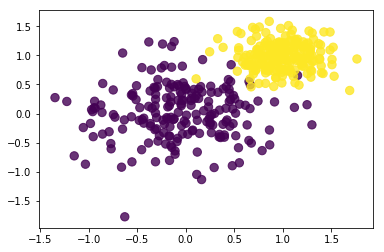

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

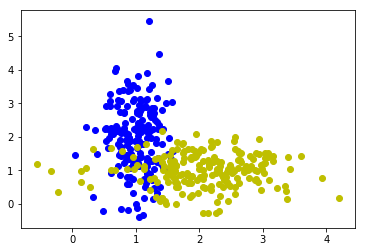

In [4]:
def create_data(N,mx,my,stdx,stdy):
    x = np.random.normal(mx,stdx,N)
    y = np.random.normal(my,stdy,N)
    return [x,y]

data1 = create_data(200,1,2,0.3,1)
data2 = create_data(200,2,1,0.8,0.5)

plt.scatter(data1[0],data1[1],color='b')
plt.scatter(data2[0],data2[1],color='y')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

/home/philipp/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


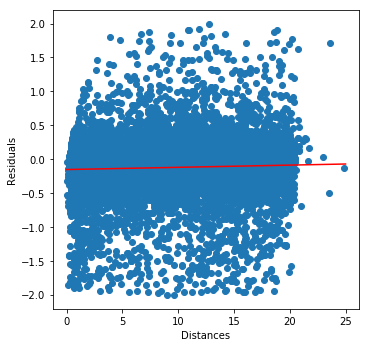

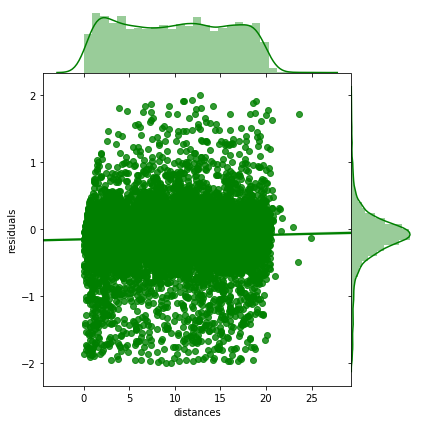

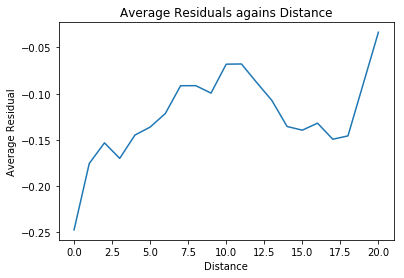

In [160]:
df = pd.DataFrame().from_dict(np.load('residuals_261.npy').item())
df_filter = df[abs(df.residuals) <= 2]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,5.5))
ax.scatter(df_filter.distances, df_filter.residuals)
l = linregress(df_filter.distances, df_filter.residuals)
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')
d = np.linspace(0,25,100)
ax.plot(d,l.intercept + d*l.slope, color='r')

g = sns.jointplot("distances", "residuals", data=df_filter,kind="reg", space=0, color="g")

bins = 21
x = np.linspace(0,20,bins)
dx = x[1] - x[0]
y = []

res, dis = np.array(df_filter.residuals), np.array(df_filter.distances)
for i in range(bins):
    data = df_filter[abs(df_filter.distances-x[i]) < dx]
    y.append(np.mean(data.residuals))

fig3, lastax = plt.subplots()
lastax.set_title('Average Residuals agains Distance')
lastax.set_xlabel('Distance')
lastax.set_ylabel('Average Residual')
lastax.plot(x,y)

In [124]:
spacing

0.10050251256281408